<a href="https://colab.research.google.com/github/AnamAtr/Elevate_Lab_-Task6/blob/main/KNN_Colab_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=1)

In [2]:
df=pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


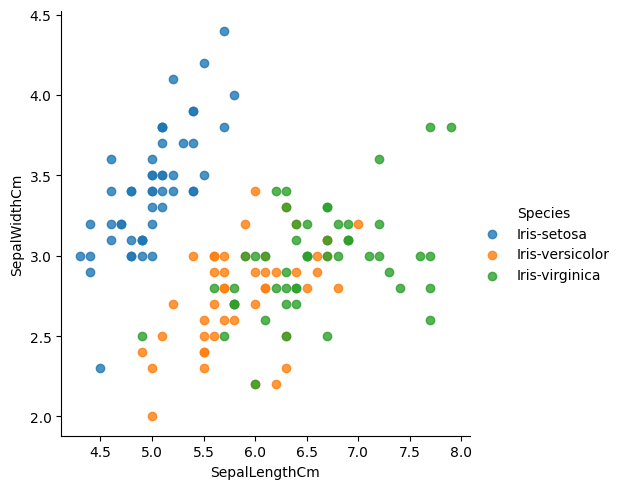

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', fit_reg=False)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
Ord_enc=OrdinalEncoder()
df['Species_code']=Ord_enc.fit_transform(df[['Species']])
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [7]:
y=df['Species_code']
y.head()

,Species_code
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [20]:
if 'Species' in df.columns:
    df = df.drop(columns=['Species'], axis=1)
# The next line is commented to retain the "Species_code" column for prediction
if 'Species_code' in df.columns:
    df = df.drop(columns=['Species_code'], axis=1)
x = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [9]:
#Create training and testing of duplictes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2006)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 42 to 45
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
k_values = range(1, 11)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train , y_train)
    acc = accuracy_score(y_test, knn.predict(x_test))
    accuracies.append(acc)

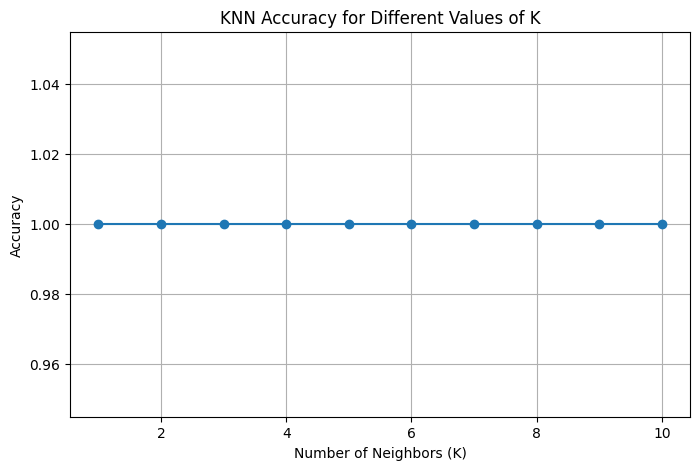

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for Different Values of K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [13]:
best_k = k_values[accuracies.index(max(accuracies))]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
print(y_pred)

[2. 1. 0. 2. 1. 1. 2. 2. 1. 1. 0. 0. 1. 2. 1. 0. 1. 2. 1. 2. 1. 1. 2. 2.
 0. 0. 2. 2. 0. 1. 1. 2. 0. 0. 2. 2. 1. 2. 0. 2. 0. 0. 0. 1. 1. 0. 0. 2.
 1. 2.]


In [22]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat, index=best_knn.classes_, columns=best_knn.classes_)


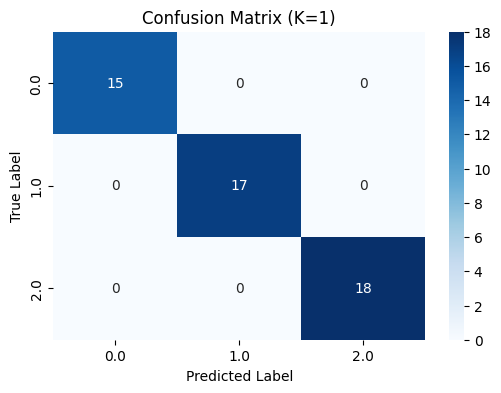

(1, 1.0)

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_df, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (K={best_k})")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

best_k, max(accuracies)

In [24]:
#visualize decision boundaries
feature_indices = [2, 3]  # PetalLengthCm and PetalWidthCm
X_vis = df.iloc[:, feature_indices].values
y_vis = y.values

In [25]:
from sklearn.preprocessing import StandardScaler
X_vis_scaled = StandardScaler().fit_transform(X_vis)
knn_vis = KNeighborsClassifier(n_neighbors=2)
knn_vis.fit(X_vis_scaled, y_vis)

KNeighborsClassifier(n_neighbors=2)

In [26]:
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

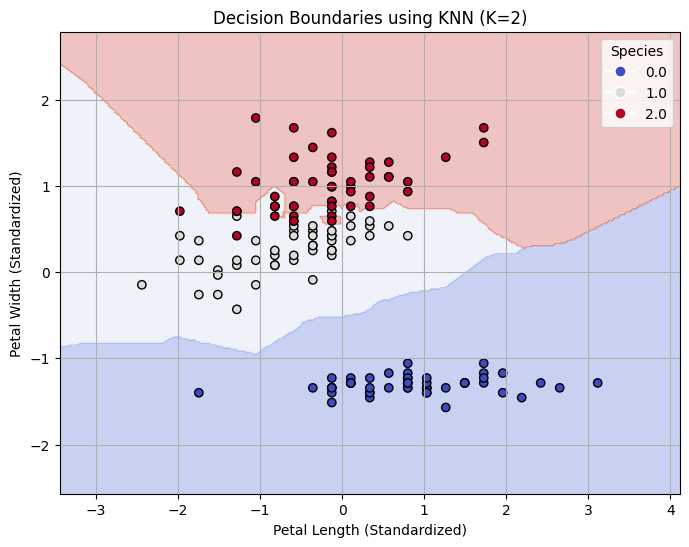

In [19]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
scatter = plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=pd.factorize(y_vis)[0], cmap="coolwarm", edgecolor="k")
plt.title("Decision Boundaries using KNN (K=2)")
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
# The original line was causing the error due to the way legend handles were being processed.
# plt.legend(handles=scatter.legend_elements()[0], labels=np.unique(y_vis))
# The following line directly creates legend handles and labels, avoiding the issue.
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=str(yi),
                              markerfacecolor=scatter.cmap(scatter.norm(yi)), markersize=8)
                   for yi in np.unique(y_vis)]
plt.legend(handles=legend_elements, title="Species")


plt.grid(True)
plt.show()